In [46]:
# Step 1: Importing the necessary libraries.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [47]:
# Step 2: Loading and pre-processing of the CIFAR-10 dataset.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [48]:
# Step 3: Normalising pixel values to be between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

In [49]:
# Step 4: Defining the class names for CIFAR-10 images.

class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

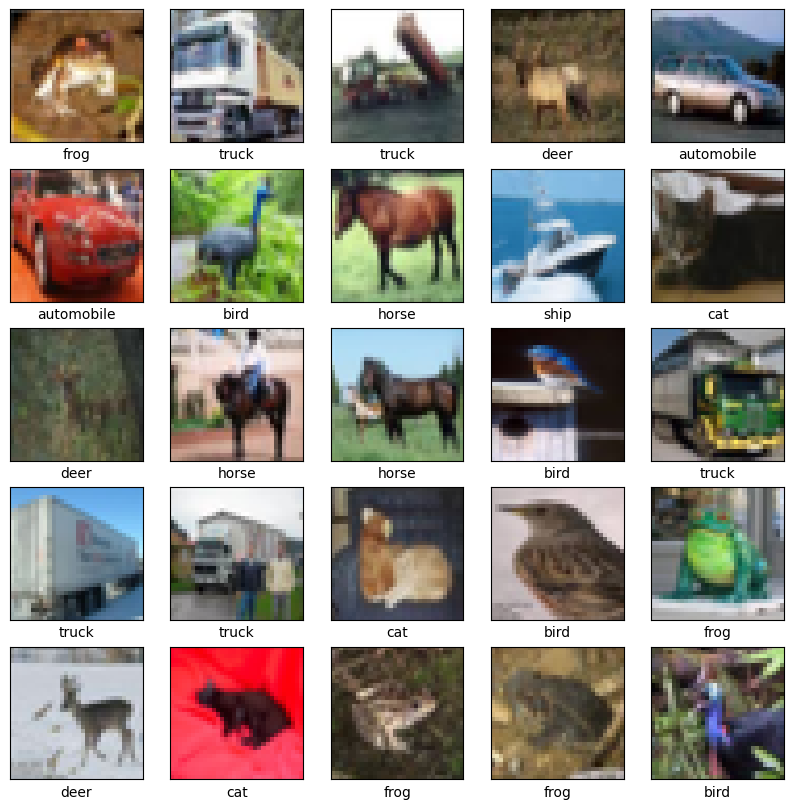

In [50]:
# Step 5: Visulaising a few training images from the CIFAR-10 dataset.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [51]:
# Step 6: Building the CNN model (customised model).

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [52]:
# Step 7: Printing the model summary.

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Step 8: Compiling the CNN model.

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# Step 9: Training the CNN model.

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3533 - loss: 1.7504 - val_accuracy: 0.5404 - val_loss: 1.2717
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5726 - loss: 1.2029 - val_accuracy: 0.6078 - val_loss: 1.1214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6473 - loss: 1.0153 - val_accuracy: 0.6643 - val_loss: 0.9698
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6836 - loss: 0.9006 - val_accuracy: 0.6805 - val_loss: 0.9193
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7106 - loss: 0.8199 - val_accuracy: 0.6847 - val_loss: 0.9225
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7351 - loss: 0.7608 - val_accuracy: 0.6804 - val_loss: 0.9083
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7538 - loss: 0.7036 - val_accuracy: 0.6905 - val_loss: 0.9094
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7712 - loss: 0.65

In [55]:
# Step 10: Evaluating the performance of the CNN model.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n Test accuracy is: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.7045 - loss: 0.8741

 Test accuracy is: 0.7045000195503235


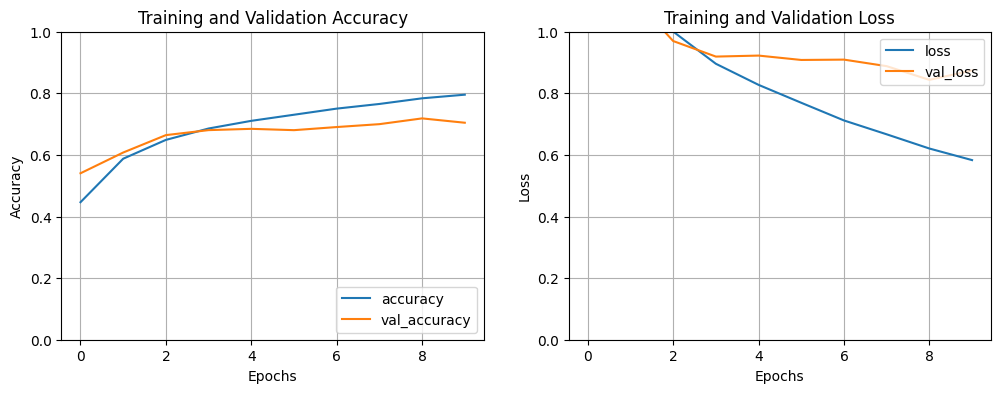

In [56]:
# Step 11: Plotting the training and validation accuracy and loss values.


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

In [57]:
!pip install keras_tuner


In [58]:
#Step 12: Hyperparameter tuning

from keras_tuner.tuners import RandomSearch

In [59]:
# Step 13: Define a function to build the model.

def build_model(hp):
    model = models.Sequential()

    # Tune the number of convolutional layers (1, 2 or 3)
    for i in range(hp.Int('conv_layers', 1, 3)):
        if i == 0:
            model.add(layers.Conv2D(
                filters=hp.Int('filters_' + str(i), min_value=32, max_value=128, step=16),
                kernel_size=3,
                activation='relu',
                input_shape=(32, 32, 3)))
        else:
            model.add(layers.Conv2D(
                filters=hp.Int('filters_' + str(i), min_value=64, max_value=128, step=16),
                kernel_size=3,
                activation='relu',
                padding='same'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Tune the number of dense layers (1, 2, or 3)
    for i in range(hp.Int('dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=16),
            activation='relu'))

        # Tune the dropout rate
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    # The last dense layer with 10 output units (for 10 classes)
    model.add(layers.Dense(10, activation='softmax'))

    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [60]:
# Step 14: Define the Tuner

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)

Reloading Tuner from my_dir/cifar10_tunning/tuner0.json


In [61]:
# Step 15: Perform the Hyperparameter search

tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [62]:
# Step 16: Get the best Hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [63]:
# Step 17: Build the model with the best Hyperparameters and train it

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2130 - loss: 2.0479 - val_accuracy: 0.4589 - val_loss: 1.4957
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4335 - loss: 1.5136 - val_accuracy: 0.5378 - val_loss: 1.2763
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5154 - loss: 1.3211 - val_accuracy: 0.6065 - val_loss: 1.1279
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5722 - loss: 1.1940 - val_accuracy: 0.6354 - val_loss: 1.0467
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6031 - loss: 1.0989 - val_accuracy: 0.6539 - val_loss: 1.0078
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6268 - loss: 1.0452 - val_accuracy: 0.6563 - val_loss: 0.9994
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6527 - loss: 0.9802 - val_accuracy: 0.6833 - val_loss: 0.9211
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6691 - loss: 0.937

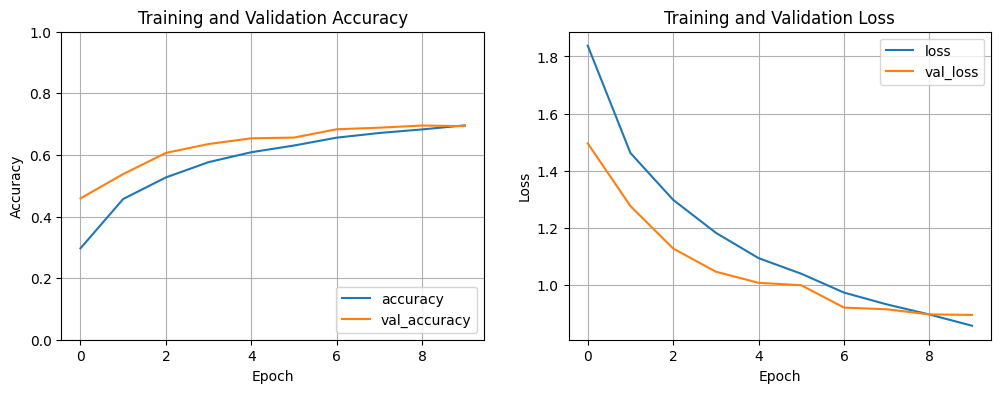

In [64]:
# Step 18: Plotting training & validation accuracy and loss values

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()